In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7202053530957991406]

In [4]:
df = pd.read_csv('data/medibloc(2018~2021).csv', encoding='cp949')
df.tail()

,날짜,시가,고가,저가,종가,거래량,시가총액
1090,30-Mar-21,102.73,119.43,102.72,111.63,229362666554,305655135725
1091,31-Mar-21,112.61,140.07,109.94,130.17,503803529611,356424611490
1092,01-Apr-21,130.17,277.06,127.18,273.11,2256586556340,747797814365
1093,02-Apr-21,267.53,398.55,267.53,298.93,1629150393198,818506251680
1094,03-Apr-21,299.90,327.75,272.89,286.96,586518672303,785724654933


In [5]:
# 종가 기준으로 구하기
prices = df['종가'].values

In [6]:
prices[-30:]

array([ 21.59,  20.85,  21.82,  22.87,  38.99,  36.64,  38.45,  40.57,
        49.31,  50.45,  48.36,  54.8 ,  57.07,  97.01, 104.02,  99.93,
       110.01, 102.34,  99.69,  93.82,  97.71,  99.43, 101.03,  99.74,
       102.74, 111.63, 130.17, 273.11, 298.93, 286.96])

In [7]:
# 최근 10일을 기준으로 다음날 가격을 예측을 위한 슬라이싱
seq_len = 10
squence_length = seq_len + 1
result = []
for i in range(len(prices) - squence_length):
    print(i)
    print(prices[i: i + squence_length])
    result.append(prices[i: i + squence_length])
result

0
[16.02 15.95 16.69 17.23 17.14 17.36 18.09 19.89 20.3  22.22 23.17]
1
[15.95 16.69 17.23 17.14 17.36 18.09 19.89 20.3  22.22 23.17 21.73]
2
[16.69 17.23 17.14 17.36 18.09 19.89 20.3  22.22 23.17 21.73 21.24]
3
[17.23 17.14 17.36 18.09 19.89 20.3  22.22 23.17 21.73 21.24 22.7 ]
4
[17.14 17.36 18.09 19.89 20.3  22.22 23.17 21.73 21.24 22.7  22.86]
5
[17.36 18.09 19.89 20.3  22.22 23.17 21.73 21.24 22.7  22.86 29.46]
6
[18.09 19.89 20.3  22.22 23.17 21.73 21.24 22.7  22.86 29.46 38.69]
7
[19.89 20.3  22.22 23.17 21.73 21.24 22.7  22.86 29.46 38.69 39.37]
8
[20.3  22.22 23.17 21.73 21.24 22.7  22.86 29.46 38.69 39.37 38.58]
9
[22.22 23.17 21.73 21.24 22.7  22.86 29.46 38.69 39.37 38.58 41.83]
10
[23.17 21.73 21.24 22.7  22.86 29.46 38.69 39.37 38.58 41.83 35.17]
11
[21.73 21.24 22.7  22.86 29.46 38.69 39.37 38.58 41.83 35.17 38.33]
12
[21.24 22.7  22.86 29.46 38.69 39.37 38.58 41.83 35.17 38.33 39.85]
13
[22.7  22.86 29.46 38.69 39.37 38.58 41.83 35.17 38.33 39.85 40.86]
14
[22.86 29.46 

[2.83 2.85 2.82 2.87 2.85 2.96 2.94 3.03 2.97 2.87 2.83]
738
[2.85 2.82 2.87 2.85 2.96 2.94 3.03 2.97 2.87 2.83 2.86]
739
[2.82 2.87 2.85 2.96 2.94 3.03 2.97 2.87 2.83 2.86 2.96]
740
[2.87 2.85 2.96 2.94 3.03 2.97 2.87 2.83 2.86 2.96 3.  ]
741
[2.85 2.96 2.94 3.03 2.97 2.87 2.83 2.86 2.96 3.   3.08]
742
[2.96 2.94 3.03 2.97 2.87 2.83 2.86 2.96 3.   3.08 3.1 ]
743
[2.94 3.03 2.97 2.87 2.83 2.86 2.96 3.   3.08 3.1  3.23]
744
[3.03 2.97 2.87 2.83 2.86 2.96 3.   3.08 3.1  3.23 3.31]
745
[2.97 2.87 2.83 2.86 2.96 3.   3.08 3.1  3.23 3.31 3.37]
746
[2.87 2.83 2.86 2.96 3.   3.08 3.1  3.23 3.31 3.37 3.25]
747
[2.83 2.86 2.96 3.   3.08 3.1  3.23 3.31 3.37 3.25 3.33]
748
[2.86 2.96 3.   3.08 3.1  3.23 3.31 3.37 3.25 3.33 3.35]
749
[2.96 3.   3.08 3.1  3.23 3.31 3.37 3.25 3.33 3.35 3.25]
750
[3.   3.08 3.1  3.23 3.31 3.37 3.25 3.33 3.35 3.25 3.2 ]
751
[3.08 3.1  3.23 3.31 3.37 3.25 3.33 3.35 3.25 3.2  3.25]
752
[3.1  3.23 3.31 3.37 3.25 3.33 3.35 3.25 3.2  3.25 3.17]
753
[3.23 3.31 3.37 3.25 3.3

[array([16.02, 15.95, 16.69, 17.23, 17.14, 17.36, 18.09, 19.89, 20.3 ,
        22.22, 23.17]),
 array([15.95, 16.69, 17.23, 17.14, 17.36, 18.09, 19.89, 20.3 , 22.22,
        23.17, 21.73]),
 array([16.69, 17.23, 17.14, 17.36, 18.09, 19.89, 20.3 , 22.22, 23.17,
        21.73, 21.24]),
 array([17.23, 17.14, 17.36, 18.09, 19.89, 20.3 , 22.22, 23.17, 21.73,
        21.24, 22.7 ]),
 array([17.14, 17.36, 18.09, 19.89, 20.3 , 22.22, 23.17, 21.73, 21.24,
        22.7 , 22.86]),
 array([17.36, 18.09, 19.89, 20.3 , 22.22, 23.17, 21.73, 21.24, 22.7 ,
        22.86, 29.46]),
 array([18.09, 19.89, 20.3 , 22.22, 23.17, 21.73, 21.24, 22.7 , 22.86,
        29.46, 38.69]),
 array([19.89, 20.3 , 22.22, 23.17, 21.73, 21.24, 22.7 , 22.86, 29.46,
        38.69, 39.37]),
 array([20.3 , 22.22, 23.17, 21.73, 21.24, 22.7 , 22.86, 29.46, 38.69,
        39.37, 38.58]),
 array([22.22, 23.17, 21.73, 21.24, 22.7 , 22.86, 29.46, 38.69, 39.37,
        38.58, 41.83]),
 array([23.17, 21.73, 21.24, 22.7 , 22.86, 29.46, 

In [8]:
# 정규화
normalized_data = []
for window in result:
    normalized_window = [((float(p)/float(window[0])) ) for p in window]   
    normalized_data.append(normalized_window)
result = np.array(normalized_data)

In [9]:
result[:,:-1], result[:,-1]

(array([[1.        , 0.99563046, 1.04182272, ..., 1.24157303, 1.26716604,
         1.38701623],
        [1.        , 1.04639498, 1.08025078, ..., 1.27272727, 1.39310345,
         1.45266458],
        [1.        , 1.0323547 , 1.02696225, ..., 1.33133613, 1.38825644,
         1.30197723],
        ...,
        [1.        , 0.93027907, 0.90619035, ..., 0.90664485, 0.9339151 ,
         1.01472593],
        [1.        , 0.97410592, 0.91674809, ..., 1.00390854, 1.09077585,
         1.27193668],
        [1.        , 0.94111746, 0.98013843, ..., 1.11977129, 1.30574782,
         2.73959274]]),
 array([1.4463171 , 1.36238245, 1.27261833, ..., 1.18325607, 2.66865351,
        2.99859565]))

In [10]:
#data split
row = int(round(result.shape[0]*0.8))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((867, 10, 1), (217, 10, 1))

In [11]:
x_test[0], y_test[0]

(array([[1.        ],
        [1.04096834],
        [1.00744879],
        [1.12662942],
        [1.0744879 ],
        [1.08566108],
        [1.0707635 ],
        [1.08193669],
        [1.02048417],
        [1.0707635 ]]),
 1.0819366852886405)

In [12]:
# LSTM  모델구현

model = Sequential()

model.add(LSTM(255,return_sequences=True, input_shape=(10,1)))

model.add(LSTM(64,return_sequences=False))

model.add(Dense(1,activation='linear'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 255)           262140    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                81920     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 344,125
Trainable params: 344,125
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Early Stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, verbose=1)

In [14]:
history = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=20, epochs=100, callbacks=es)

Epoch 1/100
44/44 [==============================] - 1s 27ms/step - loss: 0.0720 - mae: 0.1804 - val_loss: 0.1786 - val_mae: 0.3608
Epoch 2/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0355 - mae: 0.1369 - val_loss: 0.1720 - val_mae: 0.3632
Epoch 3/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0323 - mae: 0.1269 - val_loss: 0.1297 - val_mae: 0.1619
Epoch 4/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0269 - mae: 0.1224 - val_loss: 0.1524 - val_mae: 0.2087
Epoch 5/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0247 - mae: 0.1138 - val_loss: 0.1359 - val_mae: 0.1992
Epoch 6/100
44/44 [==============================] - 0s 9ms/step - loss: 0.0180 - mae: 0.0950 - val_loss: 0.1112 - val_mae: 0.1796
Epoch 7/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0177 - mae: 0.0973 - val_loss: 0.0807 - val_mae: 0.1254
Epoch 8/100
44/44 [==============================] - 0s 9ms/step - loss: 0.01

In [15]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.0532 - mae: 0.1148


[0.05321364849805832, 0.114772729575634]

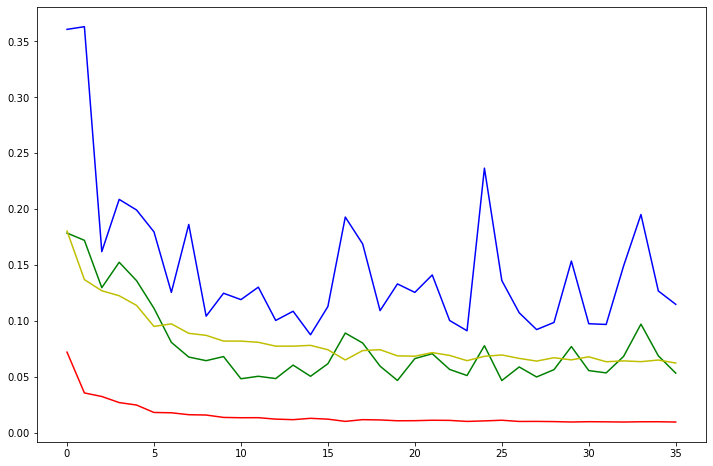

In [16]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], c='r')
plt.plot(history.history['val_loss'], c='g')
plt.plot(history.history['mae'], c='y' )
plt.plot(history.history['val_mae'], c='b')
plt.show()

In [17]:
x_test

array([[[1.        ],
        [1.04096834],
        [1.00744879],
        ...,
        [1.08193669],
        [1.02048417],
        [1.0707635 ]],

       [[1.        ],
        [0.96779964],
        [1.0822898 ],
        ...,
        [0.980322  ],
        [1.02862254],
        [1.03935599]],

       [[1.        ],
        [1.11829945],
        [1.06654344],
        ...,
        [1.06284658],
        [1.07393715],
        [1.07208872]],

       ...,

       [[1.        ],
        [0.93027907],
        [0.90619035],
        ...,
        [0.90664485],
        [0.9339151 ],
        [1.01472593]],

       [[1.        ],
        [0.97410592],
        [0.91674809],
        ...,
        [1.00390854],
        [1.09077585],
        [1.27193668]],

       [[1.        ],
        [0.94111746],
        [0.98013843],
        ...,
        [1.11977129],
        [1.30574782],
        [2.73959274]]])

In [18]:
pred = model.predict(x_test)
pred

array([[1.1314155 ],
       [1.1012735 ],
       [1.1354177 ],
       [1.0072039 ],
       [1.0431643 ],
       [1.0258185 ],
       [0.94553435],
       [0.9468692 ],
       [0.95261514],
       [0.92626905],
       [0.9077239 ],
       [0.90579647],
       [0.9409746 ],
       [0.98532844],
       [1.0034528 ],
       [1.159983  ],
       [1.099043  ],
       [1.1667548 ],
       [1.1262192 ],
       [1.1319691 ],
       [1.132717  ],
       [1.1301223 ],
       [1.0649487 ],
       [1.0473902 ],
       [0.99162585],
       [1.0195544 ],
       [0.9811914 ],
       [1.0208273 ],
       [1.0609455 ],
       [1.0709703 ],
       [1.0504726 ],
       [1.0664834 ],
       [1.0915878 ],
       [1.1256173 ],
       [1.1174873 ],
       [1.1215633 ],
       [1.0853338 ],
       [1.0490593 ],
       [1.0872663 ],
       [1.0907769 ],
       [1.1582713 ],
       [1.172424  ],
       [1.2145549 ],
       [1.1873201 ],
       [1.2041831 ],
       [1.2414101 ],
       [1.213546  ],
       [1.155

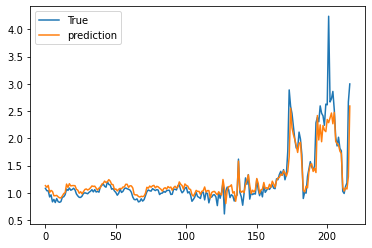

In [19]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(1,1,1)
ax.plot(y_test,label='True')
ax.plot(pred, label='prediction')
ax.legend()
plt.show()

In [20]:
r_price = [] 
r_price.append(prices[-30:])
r_price[0]

array([ 21.59,  20.85,  21.82,  22.87,  38.99,  36.64,  38.45,  40.57,
        49.31,  50.45,  48.36,  54.8 ,  57.07,  97.01, 104.02,  99.93,
       110.01, 102.34,  99.69,  93.82,  97.71,  99.43, 101.03,  99.74,
       102.74, 111.63, 130.17, 273.11, 298.93, 286.96])

In [21]:
p_price = []
    # 데이터 정규화
pre_test = []
normalized_window = [float(p)/float(r_price[0][0])for p in r_price[0]]
pre_test.append(normalized_window)
test = np.array(pre_test)
test
pre_test = test[:,:]
pre_test = np.reshape(pre_test, (pre_test.shape[0], pre_test.shape[1],1))
pre_test        

array([[[ 1.        ],
        [ 0.96572487],
        [ 1.01065308],
        [ 1.05928671],
        [ 1.80592867],
        [ 1.69708198],
        [ 1.78091709],
        [ 1.8791107 ],
        [ 2.28392774],
        [ 2.33672997],
        [ 2.23992589],
        [ 2.53821214],
        [ 2.6433534 ],
        [ 4.49328393],
        [ 4.81797128],
        [ 4.62853173],
        [ 5.09541454],
        [ 4.74015748],
        [ 4.61741547],
        [ 4.34553034],
        [ 4.52570635],
        [ 4.60537286],
        [ 4.67948124],
        [ 4.61973136],
        [ 4.75868458],
        [ 5.17044928],
        [ 6.02918018],
        [12.64983789],
        [13.84576193],
        [13.29133858]]])

In [25]:
# 170일 동안의 코인가격을 예측하는 함수
def predictCoin(prices):
    r_price = [] 
    r_price.append(prices[-10:])
    p_price = []
    for i in range(170):
        # 데이터 정규화
        pre_test = []
        normalized_window = [float(p)/float(r_price[i][0])for p in r_price[i]]
        pre_test.append(normalized_window)
        test = np.array(pre_test)
        pre_test = test[:,:]
        pre_test = np.reshape(pre_test, (pre_test.shape[0], pre_test.shape[1],1))
        # 가격 예측 후 원래 데이터셋에 추가(예측 가격은 p_price)
        pre_result = model.predict(pre_test)
        p = pre_result[0]
        p = round(r_price[i][0]*p[0],2)
        p_price.append(p)
        new_price = np.array([])
        new_price = np.append(r_price[i][1:],p)
        r_price.append(new_price)
    return p_price 

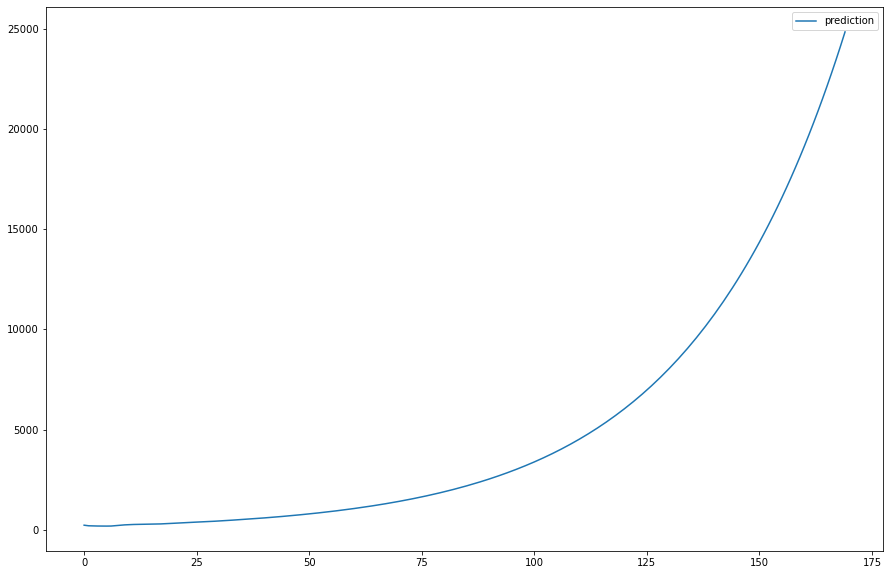

In [26]:
predictC = predictCoin(prices)

fig = plt.figure(facecolor='white',figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.plot(predictC, label='prediction')
ax.legend()
plt.show()

In [27]:
predictC

[238.77,
 209.71,
 200.87,
 197.34,
 194.74,
 193.94,
 196.83,
 217.83,
 236.98,
 254.59,
 267.06,
 274.89,
 280.63,
 285.16,
 288.68,
 291.66,
 294.95,
 302.33,
 312.18,
 323.64,
 335.82,
 348.04,
 360.06,
 371.7,
 382.8,
 393.29,
 403.26,
 413.56,
 424.56,
 436.42,
 449.12,
 462.57,
 476.66,
 491.27,
 506.27,
 521.51,
 536.89,
 552.47,
 568.35,
 584.64,
 601.45,
 618.83,
 636.84,
 655.49,
 674.79,
 694.71,
 715.2,
 736.25,
 757.86,
 780.03,
 802.81,
 826.23,
 850.32,
 875.13,
 900.7,
 927.05,
 954.2,
 982.16,
 1010.94,
 1040.56,
 1071.03,
 1102.38,
 1134.63,
 1167.81,
 1201.96,
 1237.11,
 1273.3,
 1310.55,
 1348.9,
 1388.38,
 1429.02,
 1470.85,
 1513.9,
 1558.2,
 1603.79,
 1650.72,
 1699.02,
 1748.73,
 1799.9,
 1852.56,
 1906.77,
 1962.57,
 2020.0,
 2079.11,
 2139.95,
 2202.57,
 2267.02,
 2333.36,
 2401.64,
 2471.91,
 2544.24,
 2618.69,
 2695.32,
 2774.19,
 2855.37,
 2938.92,
 3024.92,
 3113.43,
 3204.54,
 3298.31,
 3394.82,
 3494.16,
 3596.41,
 3701.65,
 3809.97,
 3921.45,
 4036.2,


### 결론
* 미래 예측인 forecast 부분을 구현하는 것은 현재 코드로 불가능 하다고 생각되며 오직 과거이 데이터를 predict할 수 있는 수준입니다.